# Lista 2

## Ćwiczenia

In [1]:
# wczytanie zbioru danych
data(stackloss)
# podsumowanie wczytanego zbioru danych
summary(stackloss)

    Air.Flow       Water.Temp     Acid.Conc.      stack.loss   
 Min.   :50.00   Min.   :17.0   Min.   :72.00   Min.   : 7.00  
 1st Qu.:56.00   1st Qu.:18.0   1st Qu.:82.00   1st Qu.:11.00  
 Median :58.00   Median :20.0   Median :87.00   Median :15.00  
 Mean   :60.43   Mean   :21.1   Mean   :86.29   Mean   :17.52  
 3rd Qu.:62.00   3rd Qu.:24.0   3rd Qu.:89.00   3rd Qu.:19.00  
 Max.   :80.00   Max.   :27.0   Max.   :93.00   Max.   :42.00  

In [2]:
# mamy 4 zmienne opisane statystycznie

#### (i) Model liniowy pomiędzy zmiennymi $stack.loss$ a $Air.Flow$

In [3]:
# wykonanie modelu liniowego zaleznosci ogolnej efektywnosci rosliny od przeplywu powietrza
model_1 = lm(stack.loss ~ Air.Flow, data = stackloss)
# podsumowanie modelu liniowego
summary(model_1)


Call:
lm(formula = stack.loss ~ Air.Flow, data = stackloss)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2896  -1.1272  -0.0459   1.1166   8.8728 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -44.13202    6.10586  -7.228 7.31e-07 ***
Air.Flow      1.02031    0.09995  10.208 3.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.098 on 19 degrees of freedom
Multiple R-squared:  0.8458,	Adjusted R-squared:  0.8377 
F-statistic: 104.2 on 1 and 19 DF,  p-value: 3.774e-09


In [4]:
# oba wspolczynniki sa wysoce statystycznie istotne
# wspolczynnik R2 jest wysoki - wynosi powyzej 83%

#### (ii) Punkt o dużej dźwigni

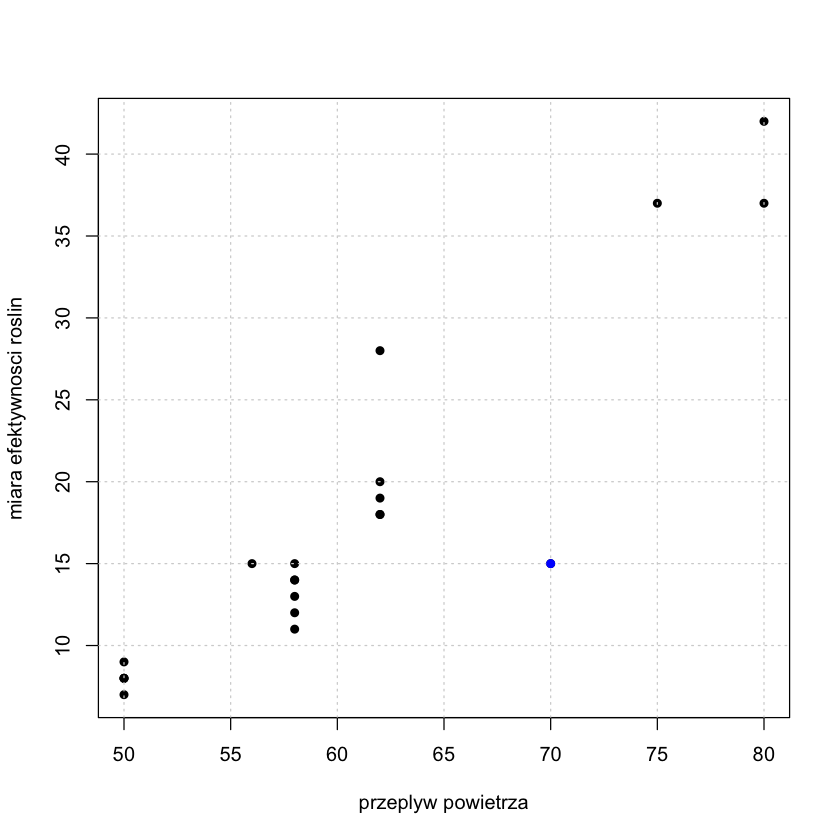

In [5]:
# wykonanie wykresu zaleznosci ogolnej efektywnosci roslin od przeplywu powietrza
plot(stackloss$Air.Flow, stackloss$stack.loss, xlab = "przeplyw powietrza", ylab = "miara efektywnosci roslin", pch = 16)
# nalozenie siatki na wykres
grid()
# zaznaczenie punktu o duzej dzwigni
points(stackloss$Air.Flow[stackloss$Air.Flow == 70 & stackloss$stack.loss == 15], stackloss$stack.loss[stackloss$Air.Flow == 70 & stackloss$stack.loss == 15], pch = 16, col = "blue")

In [6]:
# widac zaleznosc - wraz ze wzrostem przeplywu powietrza roslin miara efektywnosci roslin
# punkt o duzej dzwigni ma typowa wartosc x i nietypowa wartosc y

#### (iii) Prosta regresji dopasowana do wszystkich obserwacji oraz po usunięciu punktu

In [7]:
# wybranie numeru obserwacji, ktora ma duza dzwignie
numer_obserwacji = which(stackloss$Air.Flow == 70 & stackloss$stack.loss == 15)
numer_obserwacji

[1] 21

In [8]:
# okreslamy model liniowy bez punktu o duzej dzwigni (21. obserwacja)
model_2 = lm(stack.loss ~ Air.Flow, data = stackloss[-21,])
# podsumowanie modelu
summary(model_2)


Call:
lm(formula = stack.loss ~ Air.Flow, data = stackloss[-21, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5084 -1.9014 -0.2049  1.3801  8.0986 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -48.18928    4.40791  -10.93 2.23e-09 ***
Air.Flow      1.09824    0.07273   15.10 1.15e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.895 on 18 degrees of freedom
Multiple R-squared:  0.9268,	Adjusted R-squared:  0.9228 
F-statistic:   228 on 1 and 18 DF,  p-value: 1.153e-11


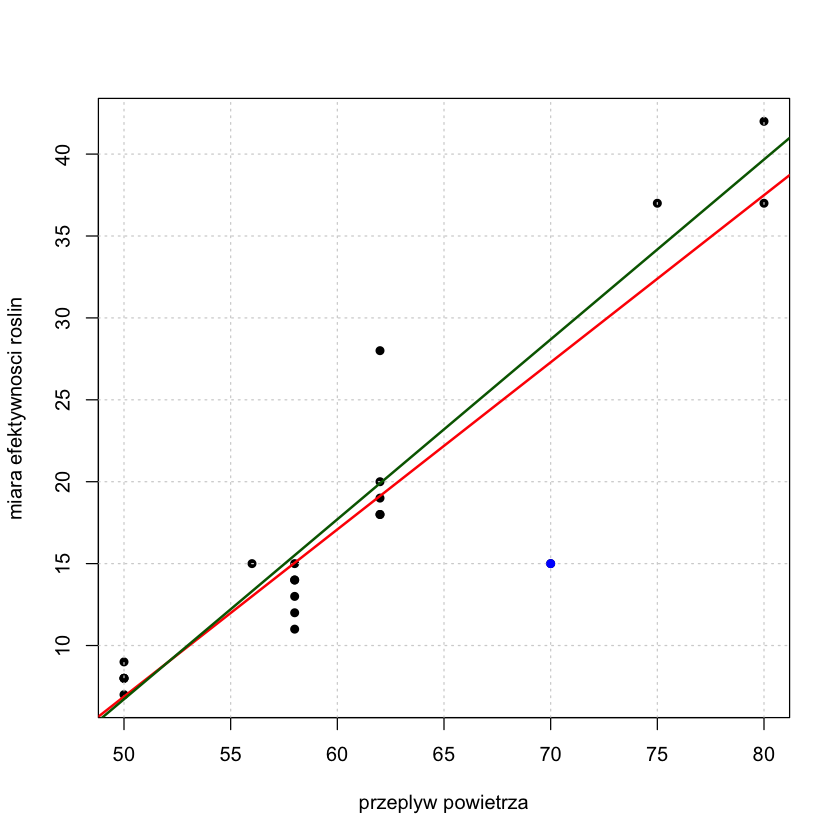

In [9]:
# wykonanie wykresu zaleznosci ogolnej efektywnosci roslin od przeplywu powietrza
plot(stackloss$Air.Flow, stackloss$stack.loss, xlab = "przeplyw powietrza", ylab = "miara efektywnosci roslin", pch = 16)
# nalozenie siatki na wykres
grid()
# zaznaczenie punktu o duzej dzwigni
points(stackloss$Air.Flow[stackloss$Air.Flow == 70 & stackloss$stack.loss == 15], stackloss$stack.loss[stackloss$Air.Flow == 70 & stackloss$stack.loss == 15], pch = 16, col = "blue")
# dodatnie linii modelu ze wszystkimi danymi
abline(model_1, col = "red", lwd = 2)
# dodanie linii modelu bez punktu o duzej dzwigni
abline(model_2, col = "darkgreen", lwd = 2)

In [10]:
# prosta regresji ze wszystkimi danymi jest bardziej nachylona niz prosta regresji nieuwzgledniajaca punktu o duzej dzwigni
# punkt o duzej dzwigni "ciagnie" prosta regresji w swoja strone (w dol)

#### (iv) Podsumowania obu modeli

In [11]:
# podsumowanie modelu dla pelnych danych
summary(model_1)


Call:
lm(formula = stack.loss ~ Air.Flow, data = stackloss)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2896  -1.1272  -0.0459   1.1166   8.8728 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -44.13202    6.10586  -7.228 7.31e-07 ***
Air.Flow      1.02031    0.09995  10.208 3.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.098 on 19 degrees of freedom
Multiple R-squared:  0.8458,	Adjusted R-squared:  0.8377 
F-statistic: 104.2 on 1 and 19 DF,  p-value: 3.774e-09


In [12]:
# oba wspolczynniki sa wysoce statystycznie istotne
# wspolczynnik R2 jest wysoki - wynosi powyzej 83%

In [13]:
# podsumowanie modelu bez punktu o duzej dzwigni
summary(model_2)


Call:
lm(formula = stack.loss ~ Air.Flow, data = stackloss[-21, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5084 -1.9014 -0.2049  1.3801  8.0986 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -48.18928    4.40791  -10.93 2.23e-09 ***
Air.Flow      1.09824    0.07273   15.10 1.15e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.895 on 18 degrees of freedom
Multiple R-squared:  0.9268,	Adjusted R-squared:  0.9228 
F-statistic:   228 on 1 and 18 DF,  p-value: 1.153e-11


In [14]:
# oba wspolczynniki sa wysoce statystycznie istotne
# wspolczynnik R2 jest wysoki - wynosi powyzej 83%

#### (v) Wyznaczenie reszt studentyzowanych

In [15]:
# reszty studentyzowane pelnego modelu
reszty_studentyzowane = rstudent(model_1)
reszty_studentyzowane

1           2           3           4           5           6 
 1.31679217 -0.13755004  1.25598036  2.51116117 -0.27509679 -0.27509679 
          7           8           9          10          11          12 
-0.03096913  0.21285107 -0.01119486 -0.25547031 -0.25547031 -0.50230592 
         13          14          15          16          17          18 
-1.01424521 -0.75428084  0.28207900  0.02938242  0.28207900  0.28207900 
         19          20          21 
 0.53780291  0.49170936 -4.47932879

#### (vi) Wyznaczenie obserwacji odstających z wektora reszt studentyzowanych

In [16]:
# wypisanie i znalezienie obserwacji, ktore moga byc odstajacymi
(wartosci_odstajace = which(abs(reszty_studentyzowane) > 2))

4 21 
 4 21

#### (vii) Wyznaczenie obserwacji odstających za pomocą $outlierTest$

In [17]:
# instalacja pakietu
#install.packages("car")
# zaladowanie pakietu
library(car)
# wyswietlenie obserwacji odstajacych (Bonferroni p < 0.05)
outlierTest(model_1)

Ładowanie wymaganego pakietu: carData



    rstudent unadjusted p-value Bonferroni p
21 -4.479329         0.00028992    0.0060884

#### (viii) Wykres wpływów

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
1,1.316792,0.27546454,0.317358611
2,-0.137550,0.27546454,0.003792471
4,2.511161,0.04908792,0.127231549
21,-4.479329,0.10211308,0.569495586


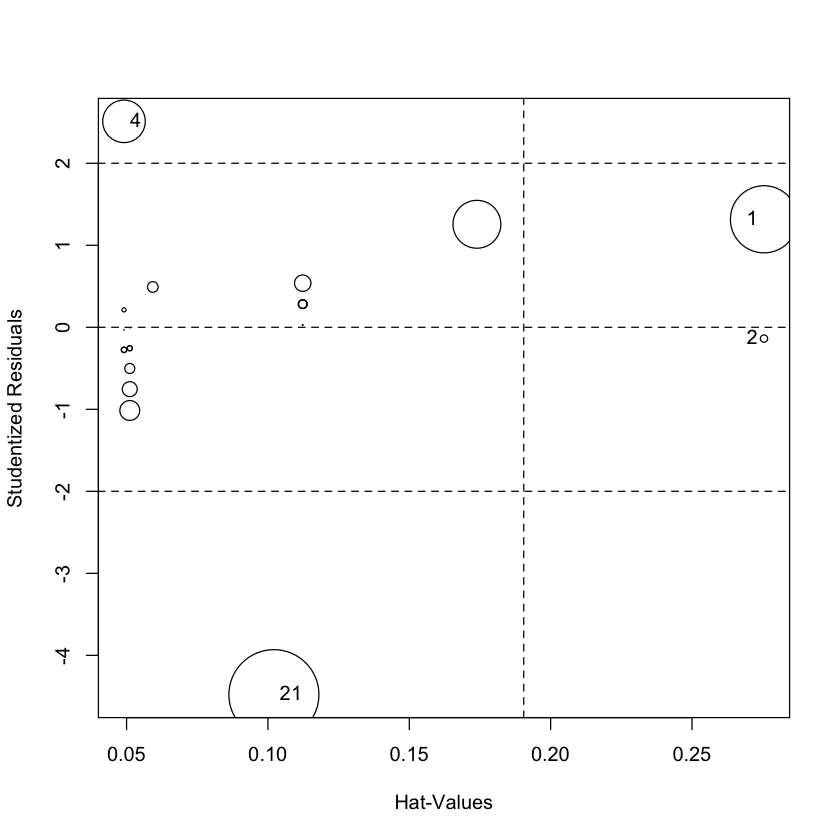

In [18]:
# wykres wplywu z tabela zawierajaca wartosci z najwiekszymi odleglosciami Cooka
influencePlot(model_1)

#### (ix) Obserwacjami wpływowymi są: 1, 2, 4 i 21

#### (x) Weryfikacja wyboru obserwacji za pomocą testu $influence.measures$

In [19]:
# znalezienie wplywowych obserwacji
(obserwacje_wplywowe = influence.measures(model_1))

Influence measures of
	 lm(formula = stack.loss ~ Air.Flow, data = stackloss) :

      dfb.1_  dfb.Ar.F    dffit cov.r   cook.d    hat inf
1  -0.681019  0.738427  0.81193 1.279 3.17e-01 0.2755    
2   0.071138 -0.077135 -0.08481 1.535 3.79e-03 0.2755   *
3  -0.441638  0.491101  0.57629 1.140 1.61e-01 0.1739    
4  -0.015324  0.098695  0.57055 0.643 1.27e-01 0.0491   *
5   0.001679 -0.010812 -0.06250 1.162 2.05e-03 0.0491    
6   0.001679 -0.010812 -0.06250 1.162 2.05e-03 0.0491    
7   0.000189 -0.001217 -0.00704 1.172 2.61e-05 0.0491    
8  -0.001299  0.008366  0.04836 1.166 1.23e-03 0.0491    
9  -0.001041  0.000681 -0.00260 1.174 3.56e-06 0.0511    
10 -0.023749  0.015534 -0.05930 1.166 1.85e-03 0.0511    
11 -0.023749  0.015534 -0.05930 1.166 1.85e-03 0.0511    
12 -0.046695  0.030543 -0.11660 1.142 7.08e-03 0.0511    
13 -0.094286  0.061672 -0.23543 1.051 2.77e-02 0.0511    
14 -0.070119  0.045865 -0.17509 1.103 1.57e-02 0.0511    
15  0.084897 -0.076149  0.10033 1.244 5.29e-03 0.

In [20]:
# obserwacje wplywowe zaznacozne sa gwiazdka

In [21]:
# wybranie i wypisanie wplywowych obserwacji
(wartosci_wplywowe = which(obserwacje_wplywowe$is.inf[, 4]))

2  4 21 
 2  4 21

#### (xi) Usunięcie obserwacji wpływowych i ponowne dopasowanie modelu

In [22]:
# model liniowy bez obserwacji wplywowych
model_3 = lm(stack.loss ~ Air.Flow, data = stackloss[-c(2, 4, 21),])
# podsumowanie modelu
summary(model_3)


Call:
lm(formula = stack.loss ~ Air.Flow, data = stackloss[-c(2, 4, 
    21), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1879 -1.5614  0.0631  1.8082  2.8082 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -50.03382    3.80009  -13.17 5.31e-10 ***
Air.Flow      1.12451    0.06412   17.54 7.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.176 on 16 degrees of freedom
Multiple R-squared:  0.9505,	Adjusted R-squared:  0.9475 
F-statistic: 307.6 on 1 and 16 DF,  p-value: 7.181e-12


In [23]:
# oba wspolczynniki sa wysoce statystycznie istotne
# wspolczynnik R2 jest najwyzszy z dotychczas otrzymanych - wynosi prawie 95%

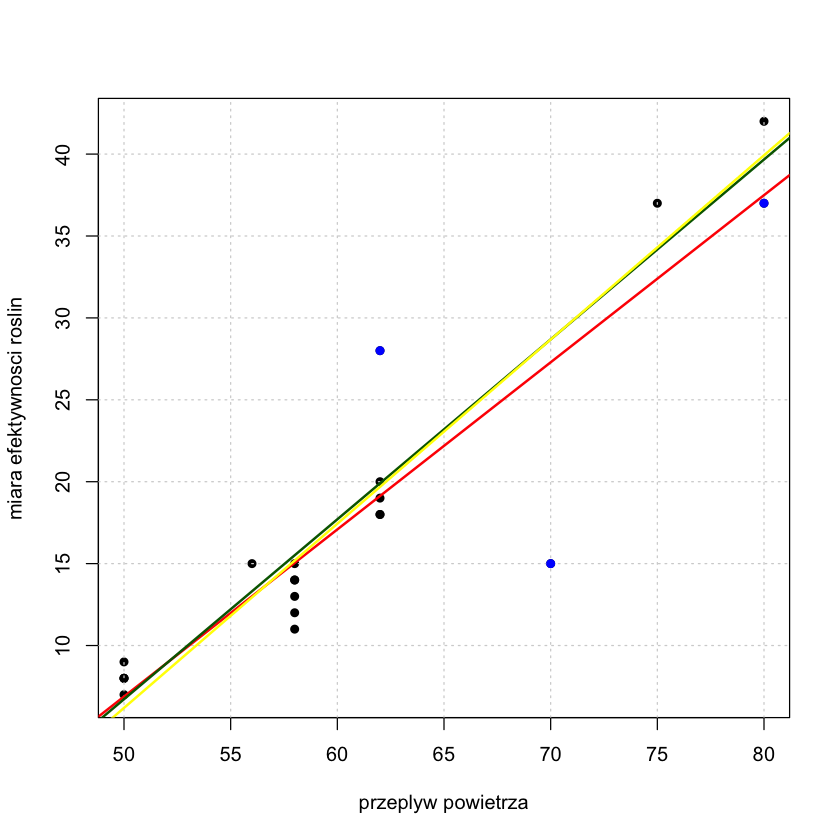

In [24]:
# wykonanie wykresu zaleznosci ogolnej efektywnosci roslin od przeplywu powietrza
plot(stackloss$Air.Flow, stackloss$stack.loss, xlab = "przeplyw powietrza", ylab = "miara efektywnosci roslin", pch = 16)
# nalozenie siatki na wykres
grid()
# zaznaczenie punktow wplywowych na wykresie
points(stackloss$Air.Flow[stackloss$Air.Flow == 70 & stackloss$stack.loss == 15], stackloss$stack.loss[stackloss$Air.Flow == 70 & stackloss$stack.loss == 15], pch = 16, col = "blue")
points(stackloss$Air.Flow[stackloss$Air.Flow == 80 & stackloss$stack.loss == 37], stackloss$stack.loss[stackloss$Air.Flow == 80 & stackloss$stack.loss == 37], pch = 16, col = "blue")
points(stackloss$Air.Flow[stackloss$Air.Flow == 62 & stackloss$stack.loss == 28], stackloss$stack.loss[stackloss$Air.Flow == 62 & stackloss$stack.loss == 28], pch = 16, col = "blue")
# dodanie linii modeli na wykres - pelnego, bez punktu o duzej dzwigni, bez 3 wplywowych punktow
abline(model_1, col = "red", lwd = 2)
abline(model_2, col = "darkgreen", lwd = 2)
abline(model_3, col = "yellow", lwd = 2)

# mozna rowniez od razu wykluczyc punkty wplywowe: plot(stackloss$Air.Flow[-wartosci_wplywowe], stackloss$stack.loss[-wartosci_wplywowe], xlab = "przeplyw powietrza", ylab = "miara efektywnosci roslin", pch = 16)
# punkty zaznaczamy wtedy osobno: points(stackloss$Air.Flow[wartosci_wplywowe], stackloss$stack.loss[wartosci_wplywowe], col = "blue", pch = 16)

## Zadanie 3

#### Przygotowanie modelu

In [25]:
# wykonanie modelu liniowego zaleznosci ogolnej efektywnosci roslin od temperatury wody i koncentracji kwasu
model_3_1 = lm(stack.loss ~ Water.Temp + Acid.Conc., data = stackloss)
# podsumowanie modelu liniowego
summary(model_3_1)


Call:
lm(formula = stack.loss ~ Water.Temp + Acid.Conc., data = stackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8197 -2.8600 -0.6656  3.1235  8.3295 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -51.2361    18.5374  -2.764   0.0128 *  
Water.Temp    2.7320     0.3949   6.919 1.82e-06 ***
Acid.Conc.    0.1290     0.2329   0.554   0.5866    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.137 on 18 degrees of freedom
Multiple R-squared:  0.7704,	Adjusted R-squared:  0.7449 
F-statistic:  30.2 on 2 and 18 DF,  p-value: 1.772e-06


In [26]:
# usuniecie zmiennej statystycznie nieistotnej - koncentracji kwasu

In [27]:
# wykonanie modelu liniowego zaleznosci ogolnej efektywnosci roslin od temperatury wody
model_3_2 = lm(stack.loss ~ Water.Temp, data = stackloss)
# podsumowanie modelu liniowego
summary(model_3_2)


Call:
lm(formula = stack.loss ~ Water.Temp, data = stackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8904 -3.6206  0.3794  2.8398  8.4747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.9109     7.6056  -5.511 2.58e-05 ***
Water.Temp    2.8174     0.3567   7.898 2.03e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.043 on 19 degrees of freedom
Multiple R-squared:  0.7665,	Adjusted R-squared:  0.7542 
F-statistic: 62.37 on 1 and 19 DF,  p-value: 2.028e-07


In [28]:
# obie zmienne sa statystycznie istotne
# wspolczynnik R2 wzrosl nieznacznie, tylko o ok. 1%

#### (ii) Punkt o dużej dźwigni

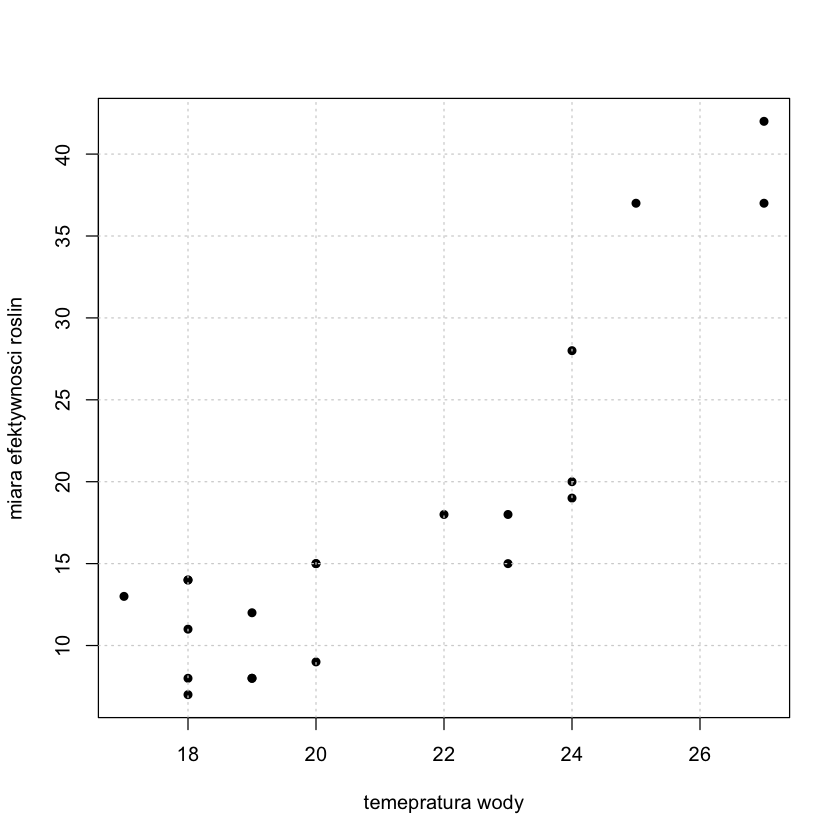

In [29]:
# wykonanie wykresu zaleznosci ogolnej efektywnosci roslin od temperatury wody
plot(stackloss$Water.Temp, stackloss$stack.loss, xlab = "temepratura wody", ylab = "miara efektywnosci roslin", pch = 16)
# nalozenie siatki na wykres
grid()

In [30]:
# wydaje sie, ze sa 4 punkty o duzej dzwigni (z najwyzszymi wartosciami zmiennej zaelznej)

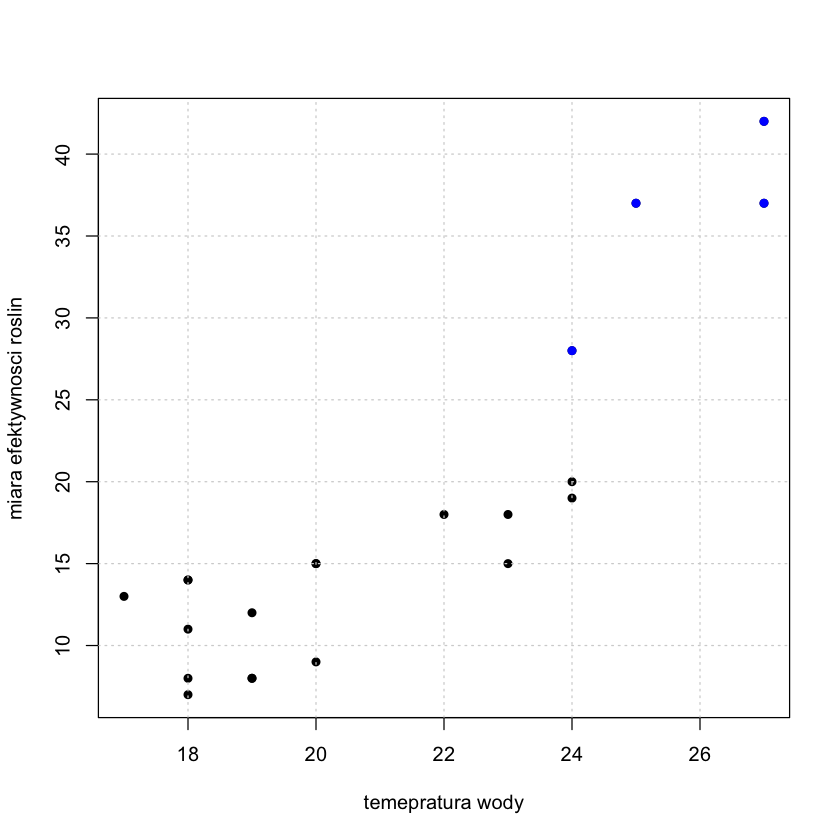

In [31]:
# wykonanie wykresu zaleznosci ogolnej efektywnosci roslin od temperatury wody
plot(stackloss$Water.Temp, stackloss$stack.loss, xlab = "temepratura wody", ylab = "miara efektywnosci roslin", pch = 16)
# nalozenie siatki na wykres
grid()
# zaznaczenie punktow o duzej dzwigni
points(stackloss$Water.Temp[stackloss$Water.Temp == 24 & stackloss$stack.loss == 28], stackloss$stack.loss[stackloss$Water.Temp == 24 & stackloss$stack.loss == 28], pch = 16, col = "blue")
points(stackloss$Water.Temp[stackloss$Water.Temp == 25 & stackloss$stack.loss == 37], stackloss$stack.loss[stackloss$Water.Temp == 25 & stackloss$stack.loss == 37], pch = 16, col = "blue")
points(stackloss$Water.Temp[stackloss$Water.Temp == 27 & stackloss$stack.loss == 37], stackloss$stack.loss[stackloss$Water.Temp == 27 & stackloss$stack.loss == 37], pch = 16, col = "blue")
points(stackloss$Water.Temp[stackloss$Water.Temp == 27 & stackloss$stack.loss == 42], stackloss$stack.loss[stackloss$Water.Temp == 27 & stackloss$stack.loss == 42], pch = 16, col = "blue")

#### (iii) Prosta regresji dopasowana do wszystkich obserwacji oraz po usunięciu punktu

In [32]:
# wybranie numerow obserwacji, ktore maja duza dzwignie
numery_obserwacji_3 = c(which(stackloss$Water.Temp == 24 & stackloss$stack.loss == 28), which(stackloss$Water.Temp == 25 & stackloss$stack.loss == 37), which(stackloss$Water.Temp == 27 & stackloss$stack.loss == 37), which(stackloss$Water.Temp == 27 & stackloss$stack.loss == 42))
numery_obserwacji_3

[1] 4 3 2 1

In [33]:
# okreslamy model liniowy bez punktow o duzej dzwigni (obserwacje 1-4)
model_3_3 = lm(stack.loss ~ Water.Temp, data = stackloss[-numery_obserwacji_3,])
# podsumowanie modelu
summary(model_3_3)


Call:
lm(formula = stack.loss ~ Water.Temp, data = stackloss[-numery_obserwacji_3, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1765 -2.4788  0.5212  1.8235  3.8700 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -13.800      6.240  -2.212 0.042935 *  
Water.Temp     1.349      0.310   4.350 0.000571 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.875 on 15 degrees of freedom
Multiple R-squared:  0.5579,	Adjusted R-squared:  0.5284 
F-statistic: 18.93 on 1 and 15 DF,  p-value: 0.0005709


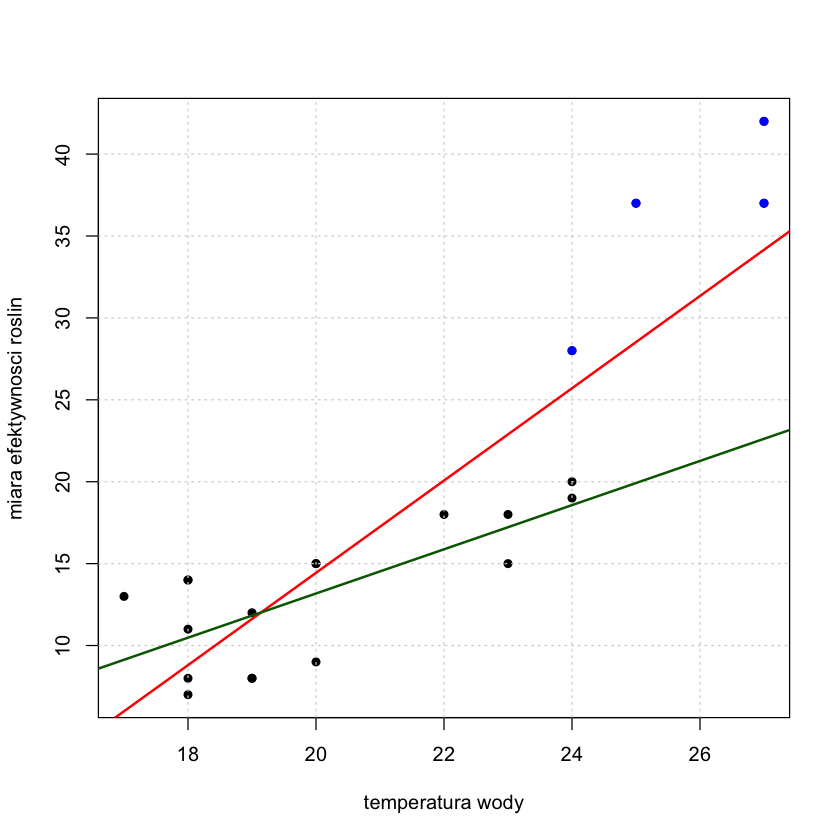

In [34]:
# wykonanie wykresu zaleznosci ogolnej efektywnosci roslin od temperatury wody
plot(stackloss$Water.Temp, stackloss$stack.loss, xlab = "temperatura wody", ylab = "miara efektywnosci roslin", pch = 16)
# nalozenie siatki na wykres
grid()
# zaznaczenie punktow o duzej dzwigni
points(stackloss$Water.Temp[numery_obserwacji_3], stackloss$stack.loss[numery_obserwacji_3], pch = 16, col = "blue")
# dodatnie linii modelu ze wszystkimi danymi
abline(model_3_2, col = "red", lwd = 2)
# dodanie linii modelu bez punktow o duzej dzwigni
abline(model_3_3, col = "darkgreen", lwd = 2)

#### (iv) Podsumowania obu modeli

In [35]:
# podsumowanie modelu dla pelnych danych
summary(model_3_2)


Call:
lm(formula = stack.loss ~ Water.Temp, data = stackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8904 -3.6206  0.3794  2.8398  8.4747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.9109     7.6056  -5.511 2.58e-05 ***
Water.Temp    2.8174     0.3567   7.898 2.03e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.043 on 19 degrees of freedom
Multiple R-squared:  0.7665,	Adjusted R-squared:  0.7542 
F-statistic: 62.37 on 1 and 19 DF,  p-value: 2.028e-07


In [36]:
# oba wspolczynniki sa wysoce statystycznie istotne
# wspolczynnik R2 jest dosyc wysoki - wynosi powyzej 75%

In [37]:
# podsumowanie modelu bez punktow o duzej dzwigni
summary(model_3_3)


Call:
lm(formula = stack.loss ~ Water.Temp, data = stackloss[-numery_obserwacji_3, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1765 -2.4788  0.5212  1.8235  3.8700 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -13.800      6.240  -2.212 0.042935 *  
Water.Temp     1.349      0.310   4.350 0.000571 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.875 on 15 degrees of freedom
Multiple R-squared:  0.5579,	Adjusted R-squared:  0.5284 
F-statistic: 18.93 on 1 and 15 DF,  p-value: 0.0005709


In [38]:
# oba wspolczynniki sa statystycznie istotne, jednak tylko zmienna zalezna ma wysoka istotnosc statystyczna
# wspolczynnik R2 jest znacznie nizszy niz wczesniej - wynosi zaledwie prawie 53%

#### (v) Wyznaczenie reszt studentyzowanych

In [39]:
# reszty studentyzowane pelnego modelu
reszty_studentyzowane_3 = rstudent(model_3_2)
reszty_studentyzowane_3

1           2           3           4           5           6 
 1.87595358  0.62826514  1.91791089  0.46654907 -0.41281538 -1.00353627 
          7           8           9          10          11          12 
-1.43238121 -1.20011508 -1.69705585  1.08893199  1.08893199  1.54629013 
         13          14          15          16          17          18 
 0.44835257  0.07593377 -0.16312557 -0.36733255 -0.73529850 -0.73529850 
         19          20          21 
-1.11563885  0.11153756  0.11153756

#### (vi) Wyznaczenie obserwacji odstających z wektora reszt studentyzowanych

In [40]:
# znalezienie obserwacji, ktore moga byc odstajacymi
wartosci_odstajace_3 = which(abs(reszty_studentyzowane_3) > 2)
wartosci_odstajace_3

named integer(0)

In [41]:
# brak obserwacji odstajacych

#### (vii) Wyznaczenie obserwacji odstających za pomocą $outlierTest$

In [42]:
# zaladowanie pakietu
library(car)
# wyswietlenie obserwacji odstajacych
outlierTest(model_3_2)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
  rstudent unadjusted p-value Bonferroni p
3 1.917911           0.071129           NA

#### (viii) Wykres wpływów

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
1,1.8759536,0.2221163,0.44361619
2,0.6282651,0.2221163,0.05820793
3,1.9179109,0.1239276,0.22802446


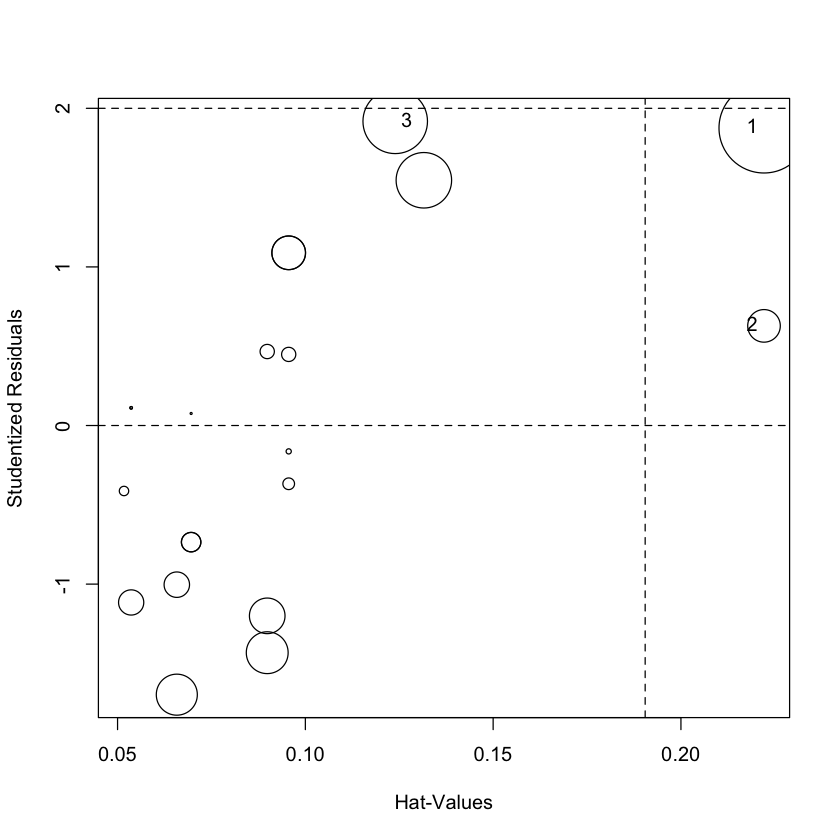

In [43]:
# wykres wplywu z tabela zawierajaca wartosci z najwiekszymi odleglosciami Cooka
influencePlot(model_3_2)

In [44]:
# 3 obserwacje o najwiekszych odleglosciach Cooka to: 3, 1 oraz 2

#### (ix) Obserwacjami wpływowymi są: 1 oraz 3

#### (x) Weryfikacja wyboru obserwacji za pomocą testu $influence.measures$

In [45]:
# znalezienie wplywowych obserwacji
obserwacje_wplywowe_3 = influence.measures(model_3_2)
obserwacje_wplywowe_3

Influence measures of
	 lm(formula = stack.loss ~ Water.Temp, data = stackloss) :

    dfb.1_ dfb.Wt.T   dffit cov.r   cook.d    hat inf
1  -0.8120  0.88850  1.0024 1.002 0.443616 0.2221   *
2  -0.2719  0.29756  0.3357 1.372 0.058208 0.2221   *
3  -0.4954  0.56604  0.7213 0.877 0.228024 0.1239    
4  -0.0840  0.10049  0.1466 1.195 0.011205 0.0898    
5   0.0135 -0.02713 -0.0964 1.153 0.004859 0.0517    
6   0.1057 -0.13991 -0.2663 1.070 0.035440 0.0658    
7   0.2579 -0.30853 -0.4500 0.986 0.095958 0.0898    
8   0.2161 -0.25850 -0.3771 1.050 0.069480 0.0898    
9   0.1787 -0.23659 -0.4503 0.886 0.092259 0.0658    
10  0.2842 -0.25073  0.3540 1.084 0.062041 0.0956    
11  0.2842 -0.25073  0.3540 1.084 0.062041 0.0956    
12  0.5280 -0.48072  0.6018 1.000 0.168744 0.1316    
13  0.1170 -0.10323  0.1457 1.205 0.011087 0.0956    
14  0.0140 -0.01167  0.0208 1.197 0.000228 0.0696    
15 -0.0426  0.03756 -0.0530 1.228 0.001482 0.0956    
16 -0.0959  0.08458 -0.1194 1.214 0.007469 0.0956    

In [46]:
# wybranie i wypisanie wplywowych obserwacji
wartosci_wplywowe_3 = which(obserwacje_wplywowe_3$is.inf[, 4])
wartosci_wplywowe_3

2 
2

#### (xi) Usunięcie obserwacji wpływowych i ponowne dopasowanie modelu

In [47]:
# model liniowy bez obserwacji wplywowych
model_3_4 = lm(stack.loss ~ Water.Temp, data = stackloss[-2,])
# podsumowanie modelu
summary(model_3_4)


Call:
lm(formula = stack.loss ~ Water.Temp, data = stackloss[-2, ])

Residuals:
   Min     1Q Median     3Q    Max 
-7.511 -3.882 -0.318  3.344  9.070 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -39.8088     8.4228  -4.726 0.000168 ***
Water.Temp    2.7096     0.4012   6.754  2.5e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.125 on 18 degrees of freedom
Multiple R-squared:  0.7171,	Adjusted R-squared:  0.7013 
F-statistic: 45.62 on 1 and 18 DF,  p-value: 2.498e-06


In [48]:
# oba wspolczynniki sa wysoce statystycznie istotne
# wspolczynnik R2 jest jednak niewiele nizszy niz oryginalny - tutaj wynosi ponad 70%

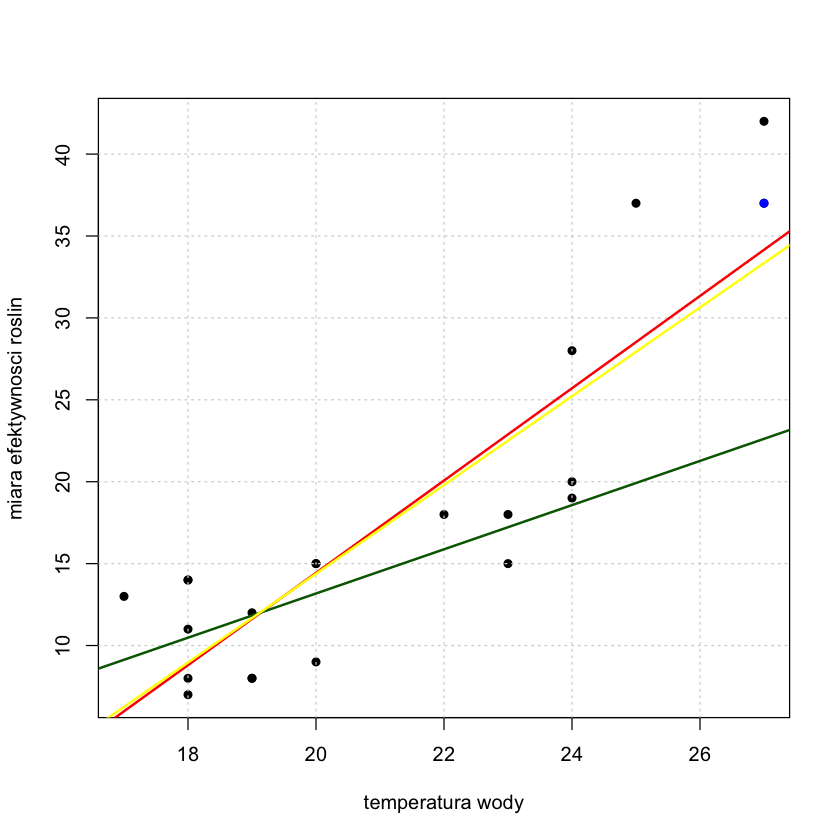

In [49]:
# wykonanie wykresu zaleznosci ogolnej efektywnosci roslin od temperatury powietrza
plot(stackloss$Water.Temp, stackloss$stack.loss, xlab = "temperatura wody", ylab = "miara efektywnosci roslin", pch = 16)
# nalozenie siatki na wykres
grid()
# zaznaczenie punktu wplywowego na wykresie
points(stackloss$Water.Temp[wartosci_wplywowe_3], stackloss$stack.loss[wartosci_wplywowe_3], col = "blue", pch = 16)
# dodanie linii modeli na wykres - pelnego, bez punktu o duzych dzwigniach, bez punktu wplywowego
abline(model_3_2, col = "red", lwd = 2)
abline(model_3_3, col = "darkgreen", lwd = 2)
abline(model_3_4, col = "yellow", lwd = 2)

## Zadanie 4

#### Przygotowanie modelu regresji

In [50]:
# wczytanie danych
reakcje = read.table("DANE_predkosc_reakcji.txt", header = FALSE)
# zmiana nazw kolumn
colnames(reakcje) = c("predkosc", "koncentracja")
# wyswietlenie pierwszych 6 wierszy danych
head(reakcje)

,predkosc,koncentracja
,<int>,<dbl>
1,15,5.2541984
2,30,6.7132842
3,30,11.2666779
4,4,0.6183255
5,26,1.7986432
6,21,6.1584493


In [51]:
# wykonanie modelu regresji miedzy predkoscia reakcji chemicznej a koncentracja skladowych
model_4_1 = lm(predkosc ~ koncentracja, data = reakcje)
# podsumowanie modelu
summary(model_4_1)


Call:
lm(formula = predkosc ~ koncentracja, data = reakcje)

Residuals:
     1      2      3      4      5      6      7 
-6.393  6.198 -1.317 -9.742 10.310 -1.886  2.830 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   12.7214     5.0330   2.528   0.0527 .
koncentracja   1.6505     0.8498   1.942   0.1098  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.665 on 5 degrees of freedom
Multiple R-squared:   0.43,	Adjusted R-squared:  0.316 
F-statistic: 3.772 on 1 and 5 DF,  p-value: 0.1098


In [52]:
# obie zmienne nie sa statystycznie istotne
# dopasowanie modelu jest slabe - wspolczynnik R2 wynosi powyzej 31%

#### (i) Wykres punktowy zależności pomiędzy zmiennymi

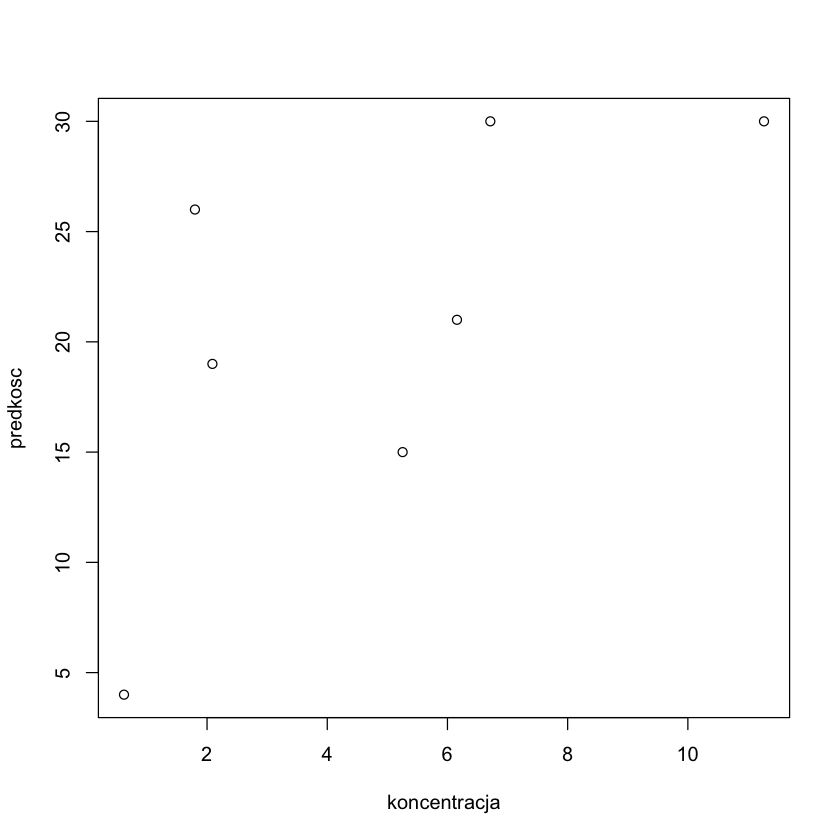

In [53]:
# wykres punktowy predkosci reakcji chemicznej od koncentracji skladowych
plot(reakcje$koncentracja, reakcje$predkosc, xlab = "koncentracja", ylab = "predkosc")

In [54]:
# na podstawie malej liczby punktow trudno jednoznacznie mowic o jakiejkolwiek zaleznosci liniowej

#### (ii) Transformacja logarytmiczna

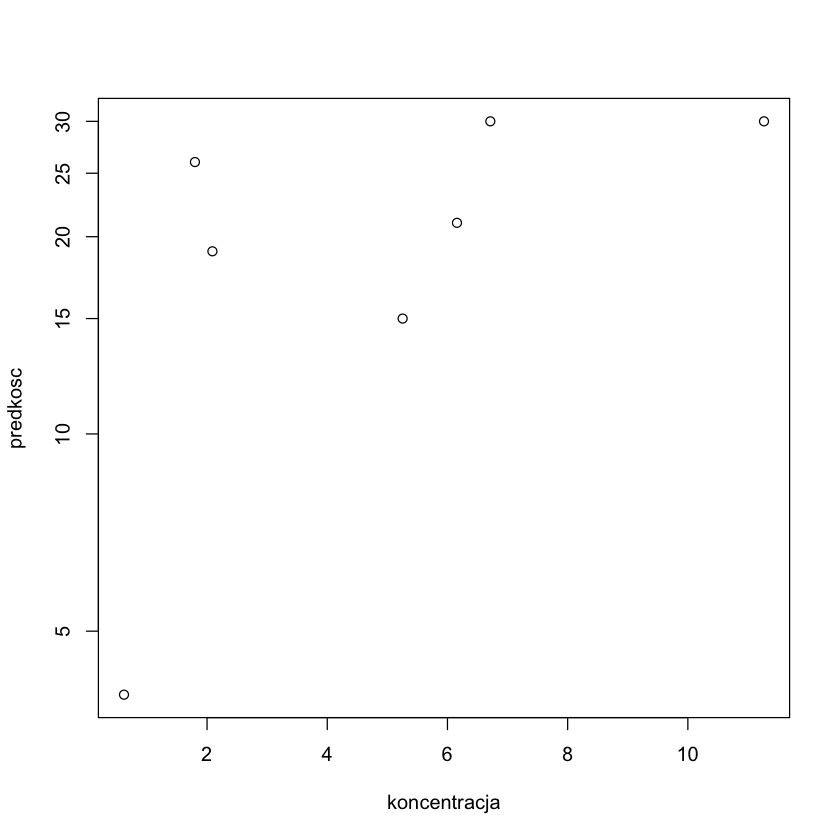

In [55]:
# wykres transformacji logarytmicznej dla zmiennej zaleznej (predkosc)
plot(reakcje$koncentracja, reakcje$predkosc, xlab = "koncentracja", ylab = "predkosc", log = "y")

In [56]:
# zlogarytmowanie zmiennej zaleznej nie poprawilo liniowosci (wrecz ja pogorszylo)

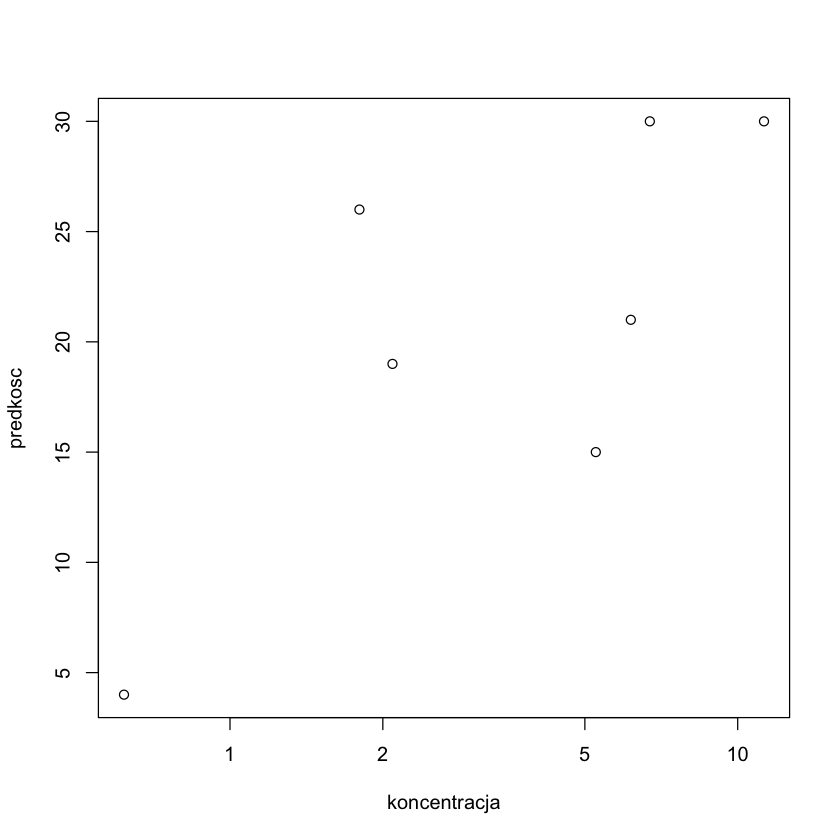

In [57]:
# wykres transformacji logarytmicznej dla zmiennej niezaleznej (koncentracja)
plot(reakcje$koncentracja, reakcje$predkosc, xlab = "koncentracja", ylab = "predkosc", log = "x")

In [58]:
# zlogarytmowanie zmiennej niezaleznej poprawilo liniowosc (liniowa zaleznosc moze wystepowac)

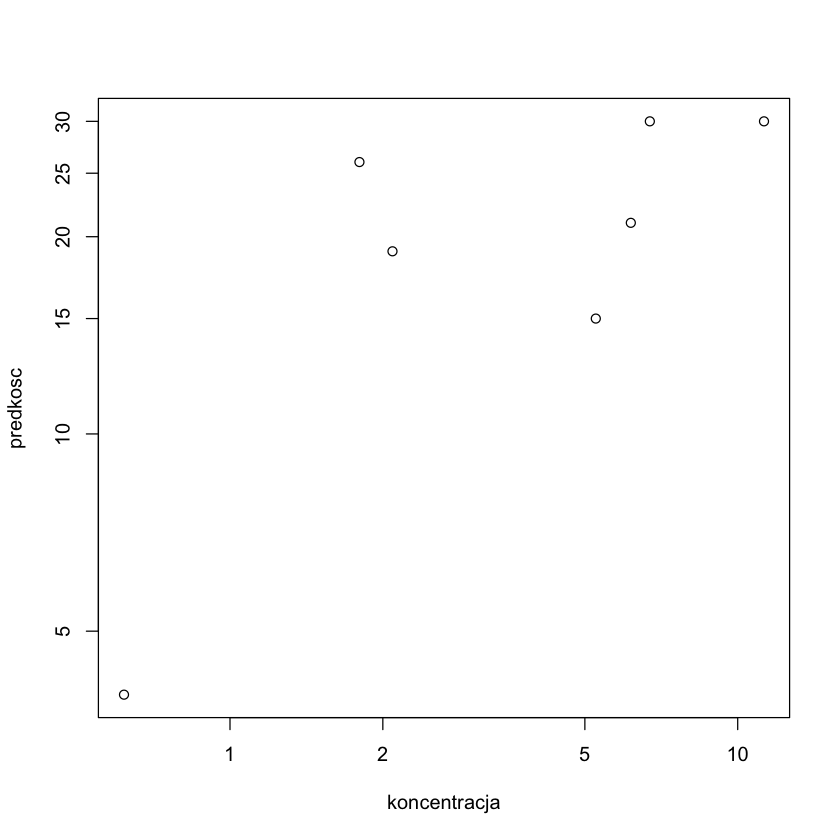

In [59]:
# wykres transformacji logarytmicznej dla obu zmiennych
plot(reakcje$koncentracja, reakcje$predkosc, xlab = "koncentracja", ylab = "predkosc", log = "xy")

In [60]:
# zlogarytmowanie obu zmiennych poprawilo liniowosc (liniowa zaleznosc moze wystepowac)

In [61]:
# model transformacji logarytmicznej dla zmiennej zaleznej (predkosc)
model_4_2 = lm(log(predkosc) ~ koncentracja, data = reakcje)
# podsumowanie modelu
summary(model_4_2)


Call:
lm(formula = log(predkosc) ~ koncentracja, data = reakcje)

Residuals:
       1        2        3        4        5        6        7 
-0.21743  0.30623 -0.22267 -1.00070  0.73400  0.01401  0.38657 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)   2.31517    0.40266   5.750  0.00223 **
koncentracja  0.11616    0.06799   1.708  0.14825   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6133 on 5 degrees of freedom
Multiple R-squared:  0.3686,	Adjusted R-squared:  0.2423 
F-statistic: 2.919 on 1 and 5 DF,  p-value: 0.1483


In [62]:
# wspolczynnik R2 zmalal wzgledem standardowego modelu

In [63]:
# model transformacji logarytmicznej dla zmiennej niezaleznej (koncentracja)
model_4_3 = lm(predkosc ~ log(koncentracja), data = reakcje)
# podsumowanie modelu
summary(model_4_3)


Call:
lm(formula = predkosc ~ log(koncentracja), data = reakcje)

Residuals:
     1      2      3      4      5      6      7 
-8.623  4.696  1.143 -4.941  9.733 -3.712  1.704 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)         12.239      4.310   2.840   0.0362 *
log(koncentracja)    6.862      2.793   2.457   0.0575 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.834 on 5 degrees of freedom
Multiple R-squared:  0.5469,	Adjusted R-squared:  0.4563 
F-statistic: 6.035 on 1 and 5 DF,  p-value: 0.05746


In [64]:
# wspolczynnik R2 wzrosl do ponad 45%

In [65]:
# model transformacji logarytmicznej dla obu zmiennych
model_4_4 = lm(log(predkosc) ~ log(koncentracja), data = reakcje)
# podsumowanie modelu
summary(model_4_4)


Call:
lm(formula = log(predkosc) ~ log(koncentracja), data = reakcje)

Residuals:
      1       2       3       4       5       6       7 
-0.4016  0.1575 -0.1258 -0.5526  0.7350 -0.1520  0.3394 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.2019     0.3071   7.170 0.000821 ***
log(koncentracja)   0.5471     0.1990   2.749 0.040346 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.487 on 5 degrees of freedom
Multiple R-squared:  0.6019,	Adjusted R-squared:  0.5222 
F-statistic: 7.558 on 1 and 5 DF,  p-value: 0.04035


In [66]:
# jest to najlepszy model, w ktorym dwie zmienne sa statystycznie istotne
# wspolczynnik R2 wzrosl az do 52%

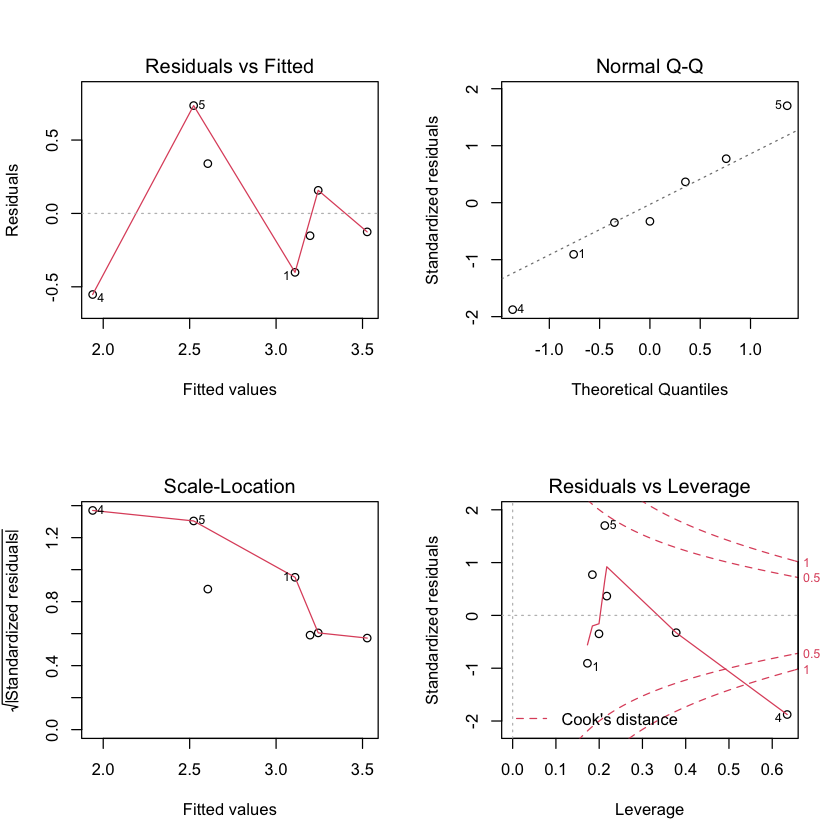

In [67]:
# wykresy diagnostyczne dla modelu z obiema zlogarytmowanymi zmiennymi
par(mfrow = c(2, 2))
plot(model_4_4)

In [68]:
# na wykresie Residuals vs Fitted punktow jest tylko 7 - trudno powiedziec czy ukladaja sie losowo (co jest pozadane) czy mamy pewna zaleznosc
# na wykresie Normal Q-Q widac, ze rozklad normalny jest calkiem dobry - wiekszosc punktow znajduje sie na prostej
# na wykresie Scale-Location punkty nie sa w okolicach 0 - model prawdopodobnie nie jest dobrze dopasowany
# na wykresie Residuals vs Leverage zaznacozne sa punkty 4 i 5 - moga byc one punktami o duzej dzwigni lub tez punktami odstajacymi
# przy tak malej liczbie obserwacji nie mozemy pozwolic sobie na usuwanie zmiennych z modelu
# pomimo zwiekszenia wspolczynnika R2, to model nie jest dobrze dopasowany

#### (iii) Model wielomianowy stopnia 2.

In [69]:
# przygotowanie modelu jako rozumowania wielomianowego stopnia 2., kolejne wspolczynniki dodajemy jako parametry w funkcji I
model_4_5 = lm(predkosc ~ I(koncentracja) + I(koncentracja^2), data = reakcje)
# podusumowanie modelu wielomianowego
summary(model_4_5)


Call:
lm(formula = predkosc ~ I(koncentracja) + I(koncentracja^2), 
    data = reakcje)

Residuals:
      1       2       3       4       5       6       7 
-7.5878  5.0674  0.4279 -8.3738 10.6267 -3.0900  2.9296 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)       10.69371    7.90800   1.352    0.248
I(koncentracja)    2.77768    3.27419   0.848    0.444
I(koncentracja^2) -0.09782    0.27230  -0.359    0.738

Residual standard error: 8.435 on 4 degrees of freedom
Multiple R-squared:  0.4478,	Adjusted R-squared:  0.1717 
F-statistic: 1.622 on 2 and 4 DF,  p-value: 0.3049


In [70]:
# mamy kolejno wspolczynniki β0 (Intercept), β1 (I(koncentracja)) i β2 (I(koncentracja^2))
# zaden ze wspolczynnikow nie jest statystycznie istotny
# wspolczynnik R2 jest bardoz niski - wynosi tylko ponad 17%

#### (iv) Dopasowana krzywa modelu wielomianowego 2. stopnia

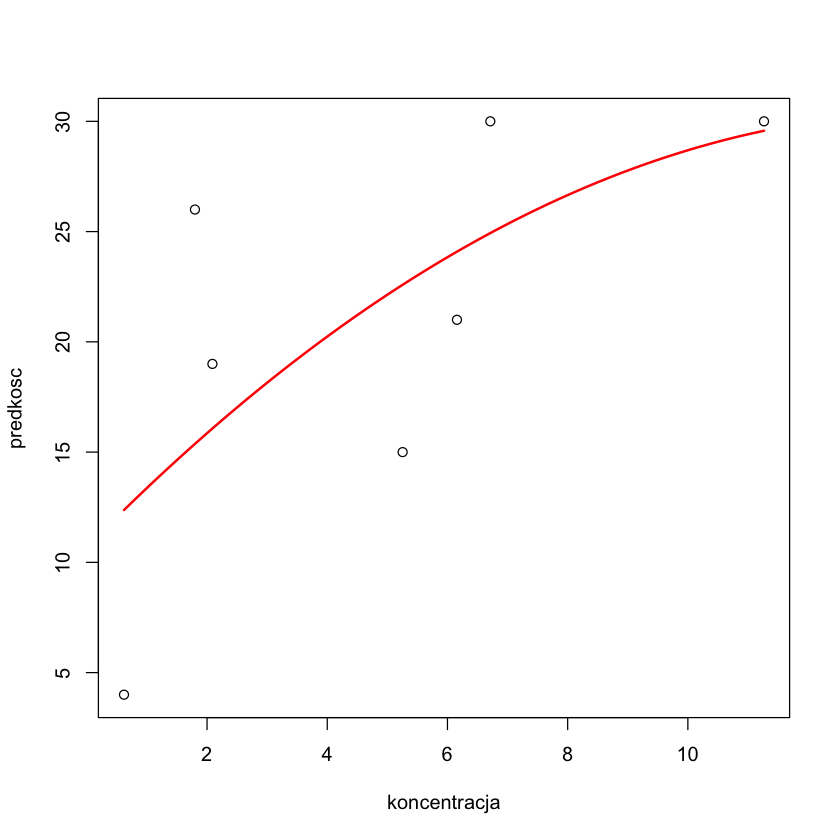

In [71]:
# wykres punktowy predkosci reakcji chemicznej od koncentracji skladowych
plot(reakcje$koncentracja, reakcje$predkosc, xlab = "koncentracja", ylab = "predkosc")
# dodatnie krzywej zaleznej (add = TRUE) od wyestymowanych wczesniej wartosci wielomianu (Estimate)
curve(10.69371 + 2.77768*x - 0.09782*x^2, add = TRUE, col = "red", lwd = 2)

In [72]:
# modelowanie wielomianowe nie przynioslo poprawienia liniowosci

#### (v) Model wielomianowy stopnia 6.

In [73]:
# przygotowanie modelu jako rozumowania wielomianowego stopnia 6.
model_4_6 = lm(predkosc ~ I(koncentracja) + I(koncentracja^2) + I(koncentracja^3) + I(koncentracja^4) + I(koncentracja^5) + I(koncentracja^6), data = reakcje)
# podusumowanie modelu wielomianowego
summary(model_4_6)


Call:
lm(formula = predkosc ~ I(koncentracja) + I(koncentracja^2) + 
    I(koncentracja^3) + I(koncentracja^4) + I(koncentracja^5) + 
    I(koncentracja^6), data = reakcje)

Residuals:
ALL 7 residuals are 0: no residual degrees of freedom!

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)       -120.76838        NaN     NaN      NaN
I(koncentracja)    325.45467        NaN     NaN      NaN
I(koncentracja^2) -246.63164        NaN     NaN      NaN
I(koncentracja^3)   83.77377        NaN     NaN      NaN
I(koncentracja^4)  -14.25726        NaN     NaN      NaN
I(koncentracja^5)    1.18499        NaN     NaN      NaN
I(koncentracja^6)   -0.03785        NaN     NaN      NaN

Residual standard error: NaN on 0 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:    NaN 
F-statistic:   NaN on 6 and 0 DF,  p-value: NA


In [74]:
# widac wyestymowane wartosci dla wspolczynnikow (Estimate), ale brak bledow standardowych (Std. Error), statystyki t (t value) i p-wartosci (Pr(>|t|))
# nie mamy rowniez wartosc wspolczynnika R2
# dla 7 obserwacji i 7 parametrach do estymacji (wielomian stopnia 6.), to wielomian idealnie przechodzi przez dane (brak bledow standardowych)

#### (v) Dopasowana krzywa modelu wielomianowego 6. stopnia

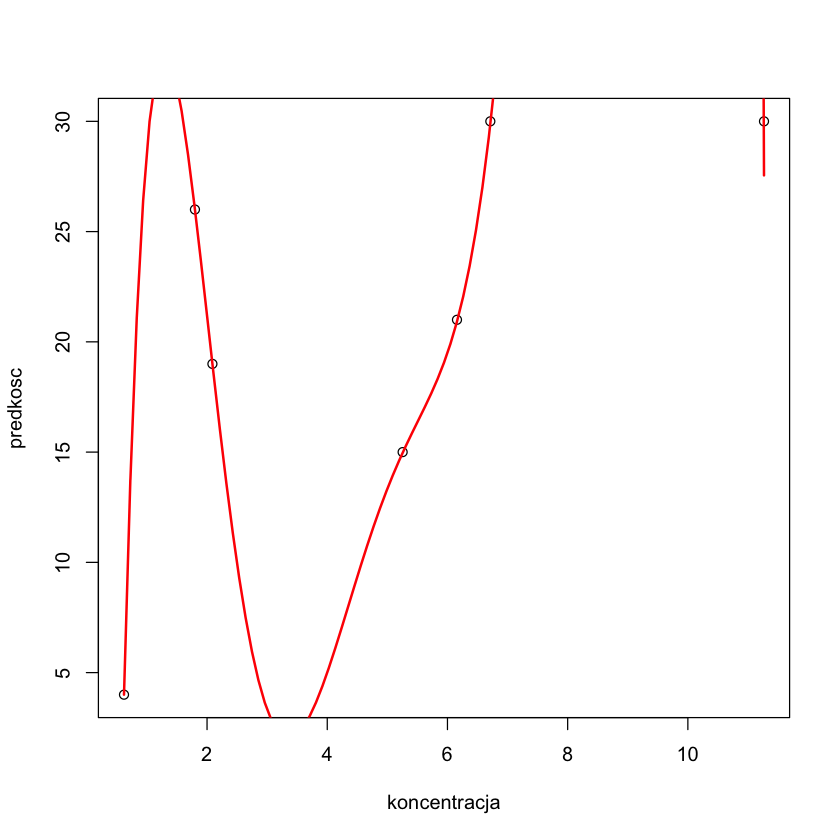

In [75]:
# wykres punktowy predkosci reakcji chemicznej od koncentracji skladowych
plot(reakcje$koncentracja, reakcje$predkosc, xlab = "koncentracja", ylab = "predkosc")
# dodatnie krzywej zaleznej (add = TRUE) od wyestymowanych wczesniej wartosci wielomianu (Estimate)
curve(-120.76838 + 325.45467*x - 246.63164*x^2 + 83.77377*x^3 - 14.25726*x^4 + 1.18499*x^5 - 0.03785*x^6, add = TRUE, col = "red", lwd = 2)

In [76]:
# model przechodzi prez wszystkie nasze dane, jednak wiemy, ze jest pewna zaleznosc - ze wzrostem koncentracji predkosc rosnie
# oczekiwanej zaleznosci nie widac na wykresie - nasz model nie jest przez to optymalny

In [77]:
# predykcja wartosci na podstawie naszego modelu
predict(model_4_6, newdata = (data.frame(koncentracja = 1)))
predict(model_4_6, newdata = (data.frame(koncentracja = 2.5)))
predict(model_4_6, newdata = (data.frame(koncentracja = 4)))

1 
28.7183

1 
9.943003

1 
5.010296

In [78]:
# wartosci otrzymane na podstawie modelu sa zupelnie niepoprawne (przewidywane wartosci sa losowe) - model zostal zatem przeestymowany